In [1]:
import pandas as pd
df_set = pd.read_csv('unique_data.csv')

In [2]:
import preprocess_df
corpus = preprocess_df.load_corpus(df_set, 'review_text')
docs = preprocess_df.corpus2docs(corpus)

In [3]:
import nltk
from nltk.probability import FreqDist

# Flatten the list of documents into a list of words
words = [word for doc in docs for word in doc]

# Get the frequency distribution
freq_dist = FreqDist(words)

print(freq_dist.most_common(20))

# # Print the frequency of each word
# for word, frequency in freq_dist.items():
#     print(f'{word}: {frequency}')

[('good', 79165), ('food', 77236), ('place', 76621), ('like', 57688), ('great', 56575), ('one', 54279), ('also', 41122), ('service', 36109), ('would', 35331), ('menu', 32722), ('restaurant', 30601), ('love', 29556), ('chicken', 28560), ('always', 28223), ('well', 28210), ('come', 26739), ('nice', 26618), ('bar', 26511), ('delicious', 25891), ('make', 25736)]


In [4]:
import gensim
dictionary = gensim.corpora.Dictionary(docs)
vecs = preprocess_df.docs2vecs(docs, dictionary)

### try 5 topics to test output

In [5]:
lda = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=5)

In [6]:
topics = lda.show_topics(10, 5)

for i in range(0, 5):
    print(topics[i])

(0, '0.015*"food" + 0.015*"chicken" + 0.014*"good" + 0.011*"place" + 0.010*"salad"')
(1, '0.012*"coffee" + 0.009*"one" + 0.008*"like" + 0.008*"place" + 0.007*"cream"')
(2, '0.014*"pizza" + 0.014*"place" + 0.012*"great" + 0.011*"bar" + 0.010*"good"')
(3, '0.018*"food" + 0.013*"sandwich" + 0.013*"good" + 0.011*"place" + 0.010*"taco"')
(4, '0.012*"food" + 0.009*"good" + 0.009*"u" + 0.009*"would" + 0.008*"came"')


### Finding optimal k topics

In [7]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())
from tqdm import tqdm
from gensim.models import CoherenceModel

model_list = []
coherence_values = []
perplexity_values = []
model_topics = []

# Iterate with a custom description
for num_topics in tqdm(range(2, 50, 1), desc="Processing data"):
    lda_x = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=num_topics)
    coherencemodel = CoherenceModel(model=lda_x, texts=docs, dictionary=dictionary, coherence='c_v')
    # Compute Perplexity
    perplex= lda_x.log_perplexity(vecs, total_docs=None)
    model_topics.append(num_topics)
    model_list.append(lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    perplexity_values.append(perplex)
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2024-04-03 01:09:37.524549


Processing data:   0%|          | 0/48 [00:00<?, ?it/s]

Processing data:   2%|▏         | 1/48 [02:00<1:34:09, 120.20s/it]

#Topics: 2 Score: 0.3112464395402379


Processing data:   4%|▍         | 2/48 [04:05<1:34:27, 123.21s/it]

#Topics: 3 Score: 0.3296503225792584


Processing data:   6%|▋         | 3/48 [06:11<1:33:24, 124.55s/it]

#Topics: 4 Score: 0.33552212761784383


Processing data:   8%|▊         | 4/48 [08:21<1:32:45, 126.49s/it]

#Topics: 5 Score: 0.3395136700405298


Processing data:  10%|█         | 5/48 [10:31<1:31:32, 127.74s/it]

#Topics: 6 Score: 0.3689246657998941


Processing data:  12%|█▎        | 6/48 [12:43<1:30:35, 129.42s/it]

#Topics: 7 Score: 0.36184930556841055


Processing data:  15%|█▍        | 7/48 [14:53<1:28:25, 129.40s/it]

#Topics: 8 Score: 0.39995669288292723


Processing data:  17%|█▋        | 8/48 [17:08<1:27:36, 131.41s/it]

#Topics: 9 Score: 0.3815188952324562


Processing data:  19%|█▉        | 9/48 [19:24<1:26:21, 132.85s/it]

#Topics: 10 Score: 0.4030129850834026


Processing data:  21%|██        | 10/48 [21:42<1:25:05, 134.36s/it]

#Topics: 11 Score: 0.39323818499211627


Processing data:  23%|██▎       | 11/48 [24:01<1:23:37, 135.60s/it]

#Topics: 12 Score: 0.430999526513756


Processing data:  25%|██▌       | 12/48 [26:16<1:21:21, 135.59s/it]

#Topics: 13 Score: 0.40877813539063806


Processing data:  27%|██▋       | 13/48 [28:32<1:19:14, 135.83s/it]

#Topics: 14 Score: 0.418709060421434


Processing data:  29%|██▉       | 14/48 [30:59<1:18:44, 138.97s/it]

#Topics: 15 Score: 0.4012442121988001


Processing data:  31%|███▏      | 15/48 [33:20<1:16:52, 139.76s/it]

#Topics: 16 Score: 0.42992592417309883


Processing data:  33%|███▎      | 16/48 [35:50<1:16:04, 142.65s/it]

#Topics: 17 Score: 0.4224739829063683


Processing data:  35%|███▌      | 17/48 [38:14<1:13:54, 143.03s/it]

#Topics: 18 Score: 0.4239578316907635


Processing data:  38%|███▊      | 18/48 [40:40<1:12:03, 144.11s/it]

#Topics: 19 Score: 0.4195161807855696


Processing data:  40%|███▉      | 19/48 [43:09<1:10:16, 145.40s/it]

#Topics: 20 Score: 0.42889346173567533


Processing data:  42%|████▏     | 20/48 [45:38<1:08:28, 146.72s/it]

#Topics: 21 Score: 0.43075698119472555


Processing data:  44%|████▍     | 21/48 [48:11<1:06:47, 148.43s/it]

#Topics: 22 Score: 0.4535928752539818


Processing data:  46%|████▌     | 22/48 [50:42<1:04:40, 149.26s/it]

#Topics: 23 Score: 0.39635322136301004


Processing data:  48%|████▊     | 23/48 [53:27<1:04:13, 154.13s/it]

#Topics: 24 Score: 0.4225535833358314


Processing data:  50%|█████     | 24/48 [56:10<1:02:38, 156.60s/it]

#Topics: 25 Score: 0.43309244530732693


Processing data:  52%|█████▏    | 25/48 [58:58<1:01:20, 160.01s/it]

#Topics: 26 Score: 0.424989775099518


Processing data:  54%|█████▍    | 26/48 [1:01:39<58:50, 160.49s/it]

#Topics: 27 Score: 0.45027162312091373


Processing data:  56%|█████▋    | 27/48 [1:04:22<56:25, 161.23s/it]

#Topics: 28 Score: 0.3870517952318854


Processing data:  58%|█████▊    | 28/48 [1:07:05<53:50, 161.51s/it]

#Topics: 29 Score: 0.41772221156807926


Processing data:  60%|██████    | 29/48 [1:09:51<51:37, 163.02s/it]

#Topics: 30 Score: 0.4215195705069324


Processing data:  62%|██████▎   | 30/48 [1:12:39<49:20, 164.49s/it]

#Topics: 31 Score: 0.4164012112359653


Processing data:  65%|██████▍   | 31/48 [1:15:28<47:00, 165.90s/it]

#Topics: 32 Score: 0.43794533117805484


Processing data:  67%|██████▋   | 32/48 [1:18:16<44:23, 166.45s/it]

#Topics: 33 Score: 0.41494609131991966


Processing data:  69%|██████▉   | 33/48 [1:21:10<42:12, 168.83s/it]

#Topics: 34 Score: 0.43249976216259983


Processing data:  71%|███████   | 34/48 [1:24:09<40:06, 171.88s/it]

#Topics: 35 Score: 0.43254094777713414


Processing data:  73%|███████▎  | 35/48 [1:27:10<37:47, 174.42s/it]

#Topics: 36 Score: 0.4233710208655313


Processing data:  75%|███████▌  | 36/48 [1:30:06<35:01, 175.13s/it]

#Topics: 37 Score: 0.4139047243188262


Processing data:  77%|███████▋  | 37/48 [1:33:04<32:15, 175.99s/it]

#Topics: 38 Score: 0.41652351262368814


Processing data:  79%|███████▉  | 38/48 [1:36:08<29:42, 178.27s/it]

#Topics: 39 Score: 0.4156164540401984


Processing data:  81%|████████▏ | 39/48 [1:39:11<26:57, 179.75s/it]

#Topics: 40 Score: 0.43619486877322


Processing data:  83%|████████▎ | 40/48 [1:42:16<24:10, 181.34s/it]

#Topics: 41 Score: 0.4180811827240348


Processing data:  85%|████████▌ | 41/48 [1:45:30<21:36, 185.19s/it]

#Topics: 42 Score: 0.4134888872143487


Processing data:  88%|████████▊ | 42/48 [1:48:45<18:48, 188.13s/it]

#Topics: 43 Score: 0.4050670250439266


Processing data:  90%|████████▉ | 43/48 [1:52:01<15:52, 190.41s/it]

#Topics: 44 Score: 0.41432978413721194


Processing data:  92%|█████████▏| 44/48 [1:55:18<12:49, 192.35s/it]

#Topics: 45 Score: 0.4246963771520571


Processing data:  94%|█████████▍| 45/48 [1:58:35<09:41, 193.87s/it]

#Topics: 46 Score: 0.4257718963110006


Processing data:  96%|█████████▌| 46/48 [2:01:53<06:29, 194.85s/it]

#Topics: 47 Score: 0.41673560369688695


Processing data:  98%|█████████▊| 47/48 [2:05:13<03:16, 196.48s/it]

#Topics: 48 Score: 0.40774512844586397


Processing data: 100%|██████████| 48/48 [2:08:30<00:00, 160.64s/it]

#Topics: 49 Score: 0.39812943373837056
2024-04-03 03:18:08.065985


In [20]:
def index_of_num_topics(num_topics):
    return num_topics - 2

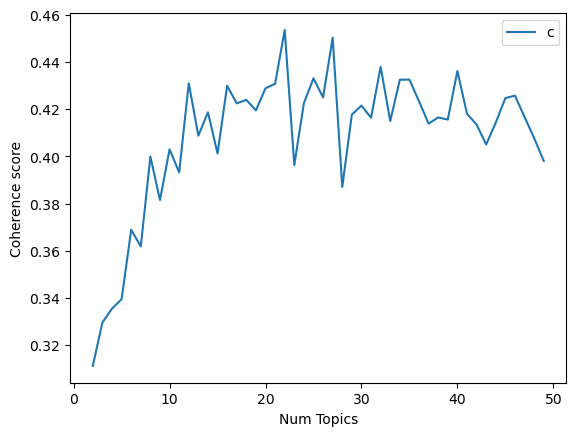

In [10]:
# Show coherence score graph

import matplotlib.pyplot as plt

limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
# Save the plot
plt.savefig('coherence_values.png')

plt.show()

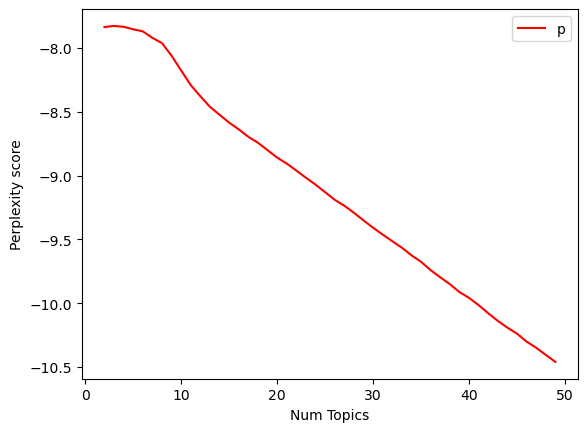

In [17]:
# Show perplexity score graph

import matplotlib.pyplot as plt

limit=50; start=2; step=1;
x_plex = range(start, limit, step)
plt.plot(x_plex, perplexity_values,color='red')
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
# Save the plot
plt.savefig('perplexity_values.png')

plt.show()

### 22 Topics

In [13]:
my_lda = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=22)
topics = my_lda.show_topics(22, 5)

for topic in topics:
    print(topic)

(0, '0.051*"taco" + 0.022*"mexican" + 0.020*"chip" + 0.020*"salsa" + 0.018*"burrito"')
(1, '0.030*"shrimp" + 0.027*"roll" + 0.025*"sushi" + 0.021*"crab" + 0.018*"fish"')
(2, '0.025*"chicken" + 0.024*"food" + 0.019*"rice" + 0.016*"dish" + 0.015*"good"')
(3, '0.082*"beer" + 0.025*"bar" + 0.024*"good" + 0.017*"great" + 0.015*"selection"')
(4, '0.043*"bbq" + 0.037*"dog" + 0.036*"rib" + 0.031*"chicken" + 0.027*"pork"')
(5, '0.056*"breakfast" + 0.036*"egg" + 0.016*"toast" + 0.016*"good" + 0.015*"brunch"')
(6, '0.021*"u" + 0.014*"table" + 0.014*"came" + 0.012*"minute" + 0.010*"got"')
(7, '0.020*"food" + 0.018*"good" + 0.018*"would" + 0.015*"like" + 0.012*"service"')
(8, '0.027*"bar" + 0.015*"place" + 0.015*"drink" + 0.014*"night" + 0.012*"great"')
(9, '0.012*"dessert" + 0.012*"restaurant" + 0.011*"menu" + 0.011*"cake" + 0.011*"delicious"')
(10, '0.022*"location" + 0.017*"food" + 0.015*"always" + 0.012*"one" + 0.012*"place"')
(11, '0.099*"sandwich" + 0.022*"meat" + 0.019*"bread" + 0.016*"good"

In [21]:
print("--22 Topics--")
print(f"Coherence Score: {coherence_values[index_of_num_topics(22)]}")
print(f"Perplexity Score: {perplexity_values[index_of_num_topics(22)]}")

--22 Topics--
Coherence Score: 0.4535928752539818
Perplexity Score: -8.959787681403856


### 3 topics

In [27]:
lda_3 = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=3)
topics_3 = lda_3.show_topics(3, 5)

for i in range(0, 3):
    print(topics_3[i])

(0, '0.015*"good" + 0.013*"great" + 0.012*"food" + 0.011*"place" + 0.009*"pizza"')
(1, '0.010*"chicken" + 0.009*"good" + 0.008*"flavor" + 0.007*"also" + 0.007*"like"')
(2, '0.011*"food" + 0.011*"place" + 0.008*"one" + 0.008*"like" + 0.007*"good"')



Perplexity for LDAModel:  -7.832737774731032


### 4 topics

In [30]:
lda_4 = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=4)
topics_4 = lda_4.show_topics(4, 5)

for i in range(0, 4):
    print(topics_4[i])

(0, '0.010*"breakfast" + 0.009*"cream" + 0.008*"delicious" + 0.008*"good" + 0.007*"flavor"')
(1, '0.015*"chicken" + 0.015*"good" + 0.014*"food" + 0.010*"place" + 0.009*"sauce"')
(2, '0.011*"pizza" + 0.010*"place" + 0.008*"like" + 0.008*"one" + 0.007*"location"')
(3, '0.016*"food" + 0.012*"place" + 0.011*"good" + 0.009*"service" + 0.008*"great"')



Perplexity for LDAModel:  -7.829242808590614


### 9 topics

In [32]:
lda_9 = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=9)
topics_9 = lda_9.show_topics(9, 5)

for i in range(0, 9):
    print(topics_9[i])


(0, '0.016*"place" + 0.012*"coffee" + 0.010*"great" + 0.010*"always" + 0.009*"location"')
(1, '0.025*"food" + 0.013*"good" + 0.012*"place" + 0.012*"restaurant" + 0.009*"service"')
(2, '0.024*"good" + 0.023*"food" + 0.020*"great" + 0.018*"place" + 0.017*"chicken"')
(3, '0.042*"pizza" + 0.016*"salad" + 0.011*"cheese" + 0.010*"sauce" + 0.008*"menu"')
(4, '0.011*"one" + 0.009*"like" + 0.008*"would" + 0.006*"could" + 0.006*"u"')
(5, '0.027*"bar" + 0.024*"beer" + 0.016*"great" + 0.014*"drink" + 0.014*"wine"')
(6, '0.019*"sandwich" + 0.018*"burger" + 0.016*"fry" + 0.016*"cheese" + 0.015*"good"')
(7, '0.035*"taco" + 0.023*"chicken" + 0.016*"food" + 0.015*"mexican" + 0.014*"salsa"')
(8, '0.018*"cream" + 0.018*"flavor" + 0.015*"ice" + 0.013*"chocolate" + 0.012*"sweet"')



Perplexity for LDAModel:  -8.059983366928355


### 10 topics

In [34]:
lda_10 = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dictionary, num_topics=10)
topics_10 = lda_10.show_topics(10, 5)

for i in range(0, 10):
    print(topics_10[i])

(0, '0.028*"chicken" + 0.017*"food" + 0.015*"dish" + 0.014*"rice" + 0.013*"sauce"')
(1, '0.023*"sandwich" + 0.018*"cheese" + 0.016*"salad" + 0.014*"bread" + 0.012*"breakfast"')
(2, '0.031*"taco" + 0.020*"sushi" + 0.020*"roll" + 0.013*"mexican" + 0.013*"fish"')
(3, '0.023*"coffee" + 0.008*"place" + 0.006*"location" + 0.006*"new" + 0.006*"shop"')
(4, '0.049*"pizza" + 0.013*"good" + 0.012*"like" + 0.011*"place" + 0.010*"sauce"')
(5, '0.012*"one" + 0.011*"would" + 0.009*"like" + 0.009*"food" + 0.009*"u"')
(6, '0.020*"cream" + 0.018*"ice" + 0.016*"chocolate" + 0.015*"flavor" + 0.015*"tea"')
(7, '0.023*"bar" + 0.022*"beer" + 0.018*"wine" + 0.009*"menu" + 0.009*"great"')
(8, '0.025*"good" + 0.022*"food" + 0.016*"great" + 0.015*"place" + 0.012*"service"')
(9, '0.021*"place" + 0.021*"food" + 0.017*"always" + 0.016*"great" + 0.014*"good"')


### Code for generating topic word frequency images and graphs

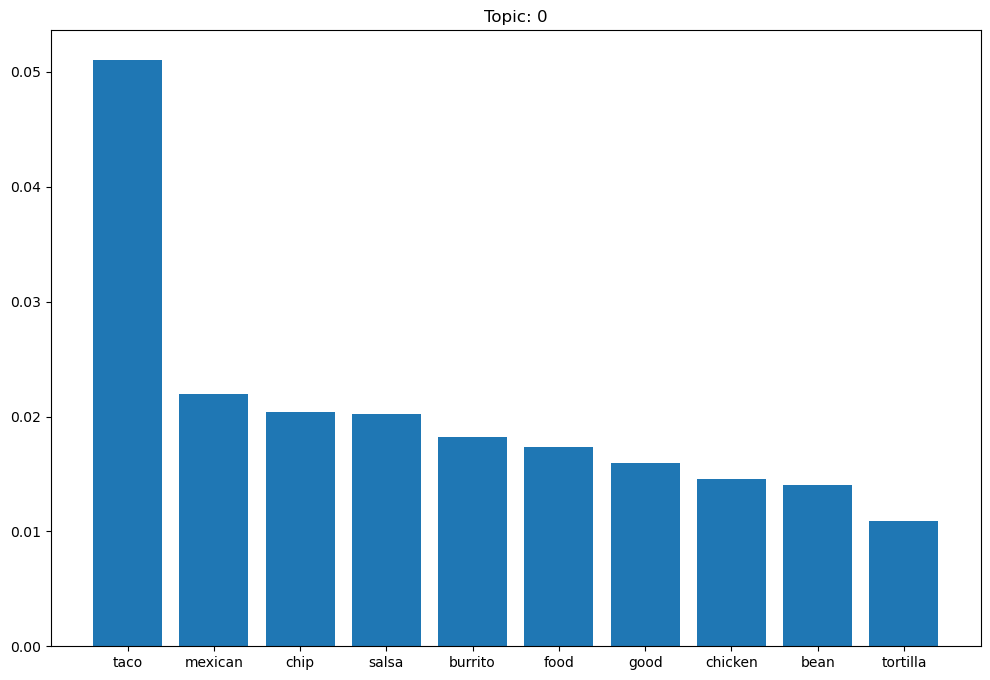

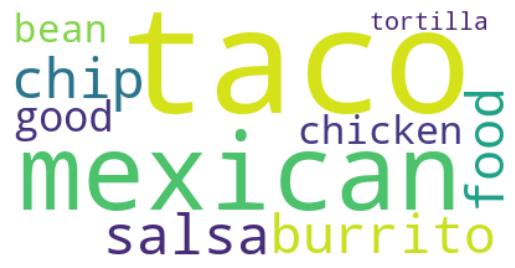

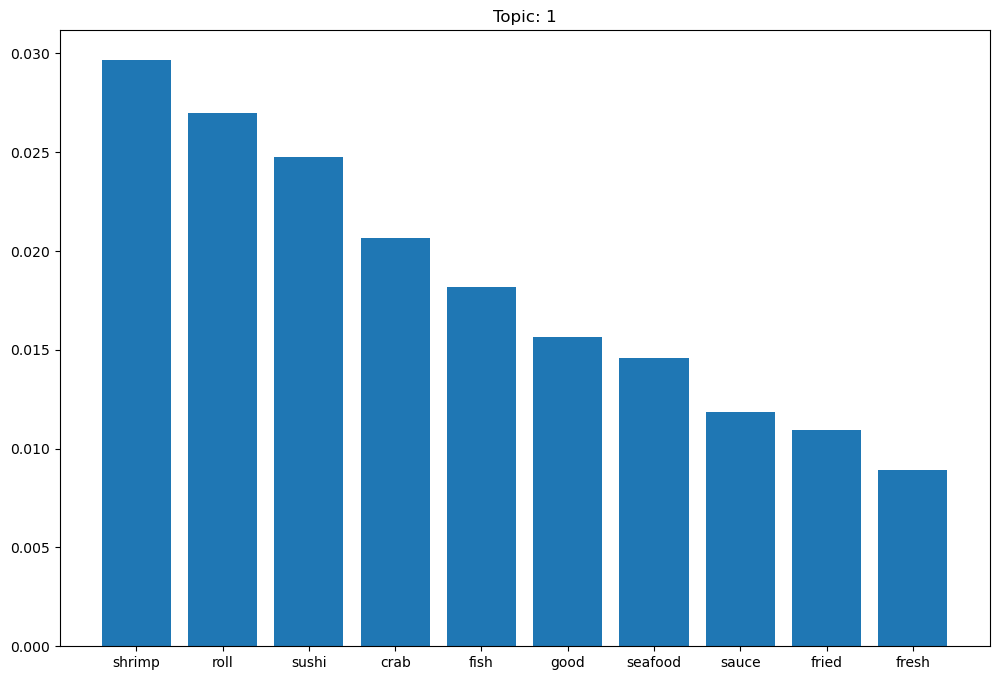

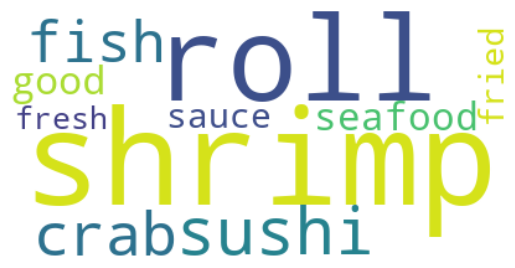

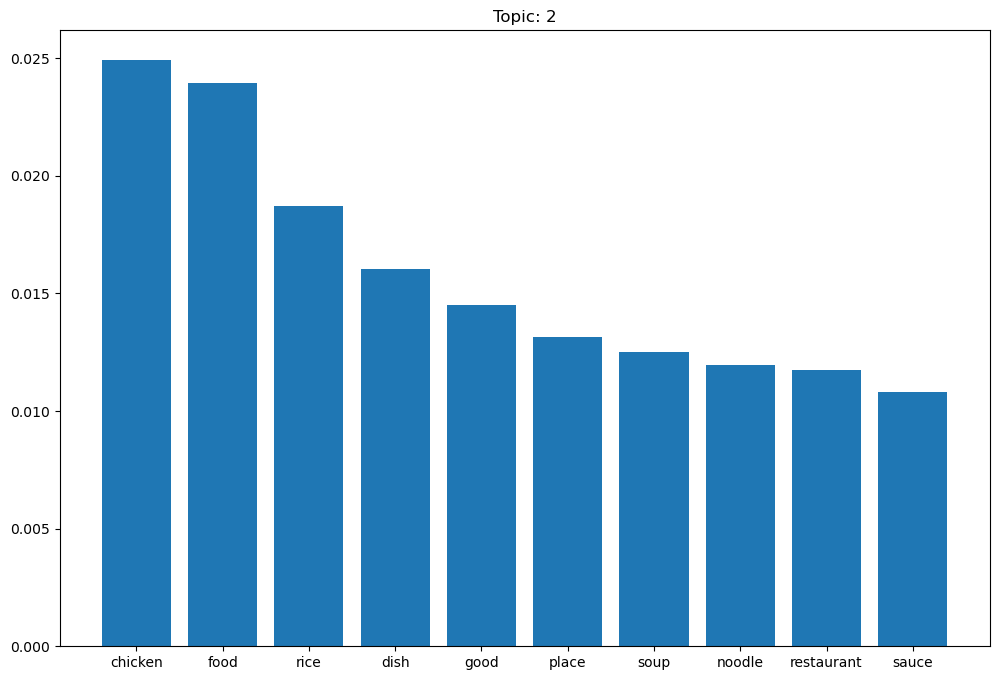

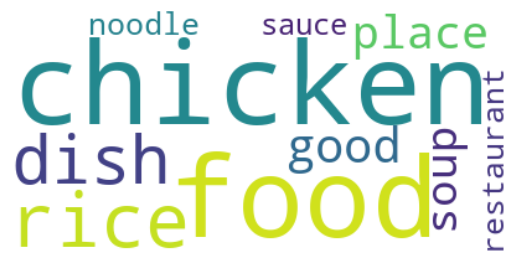

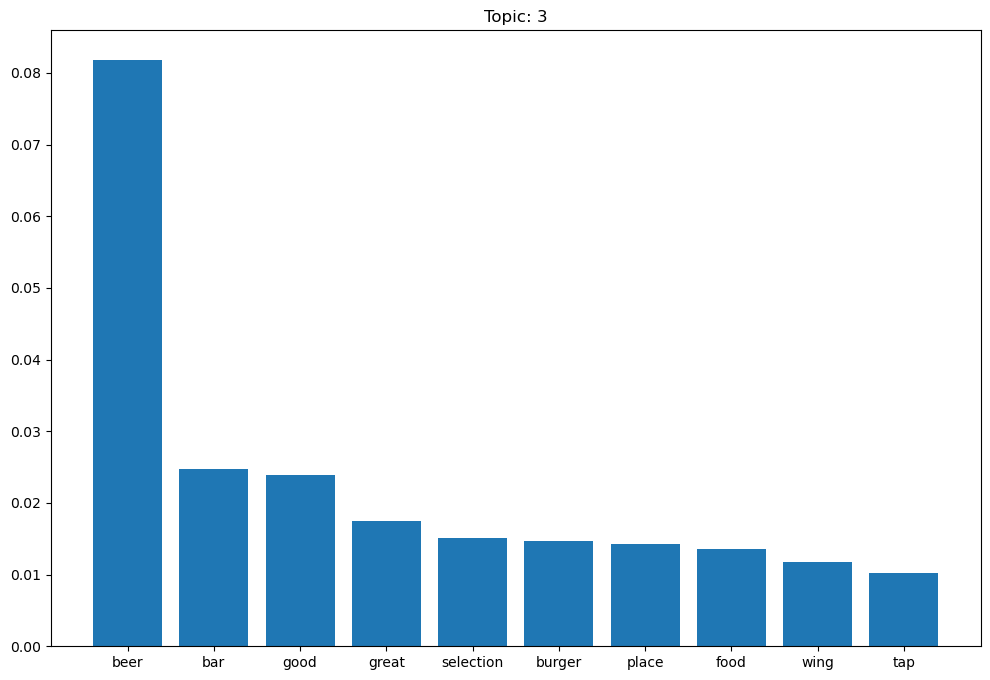

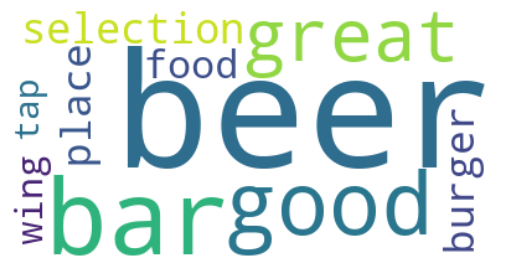

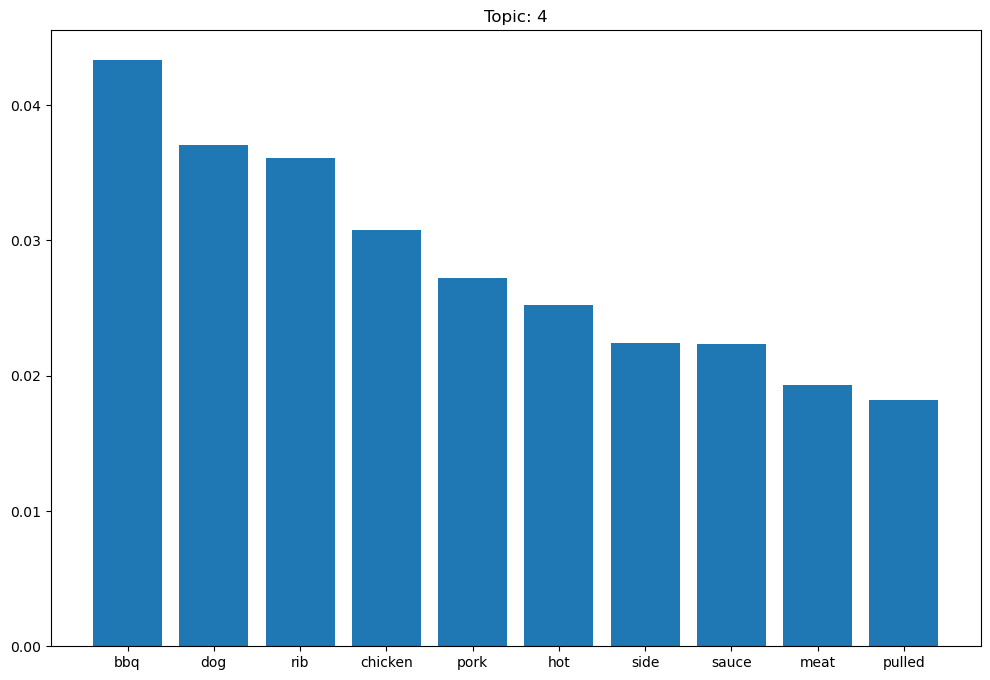

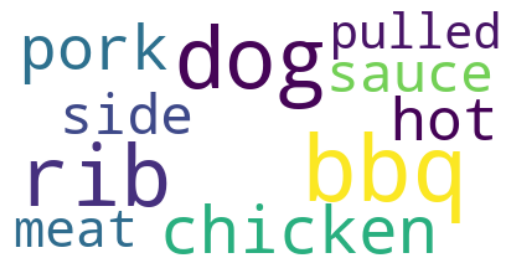

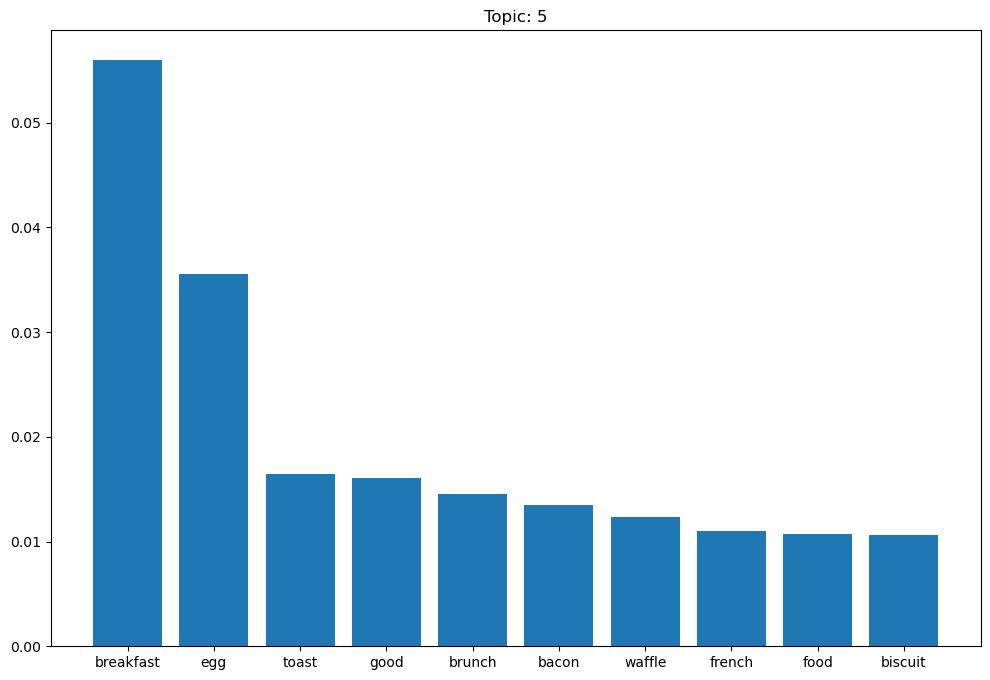

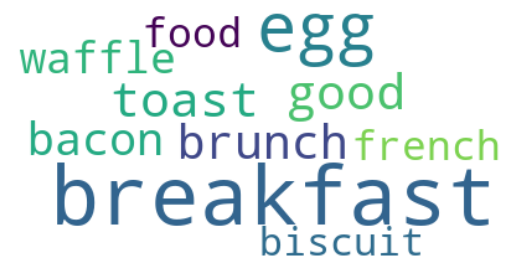

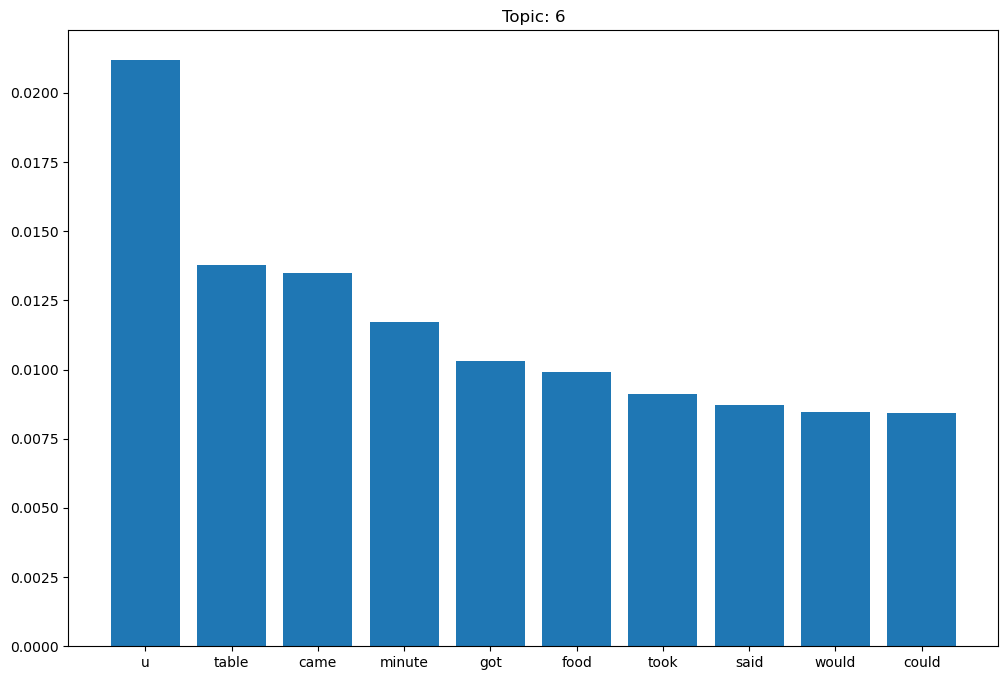

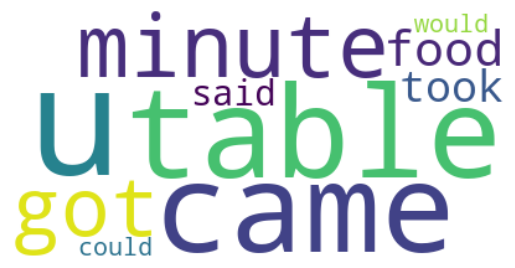

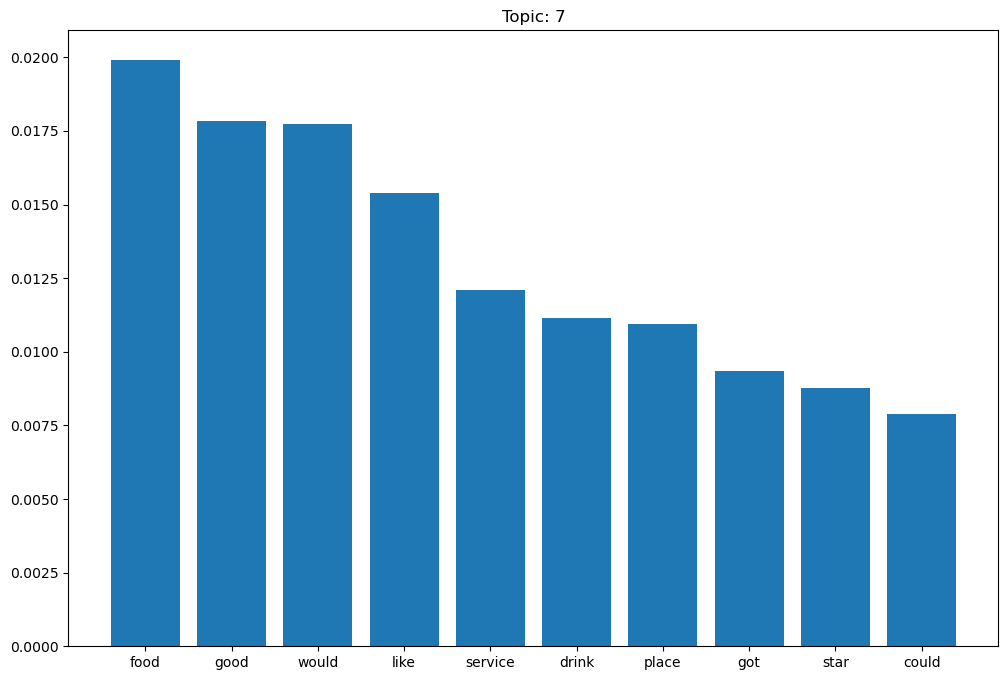

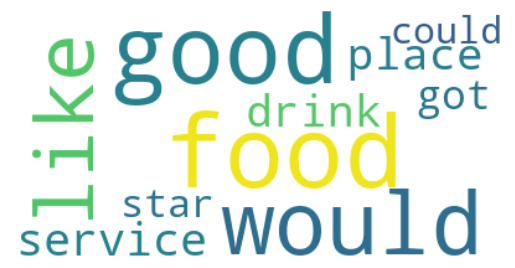

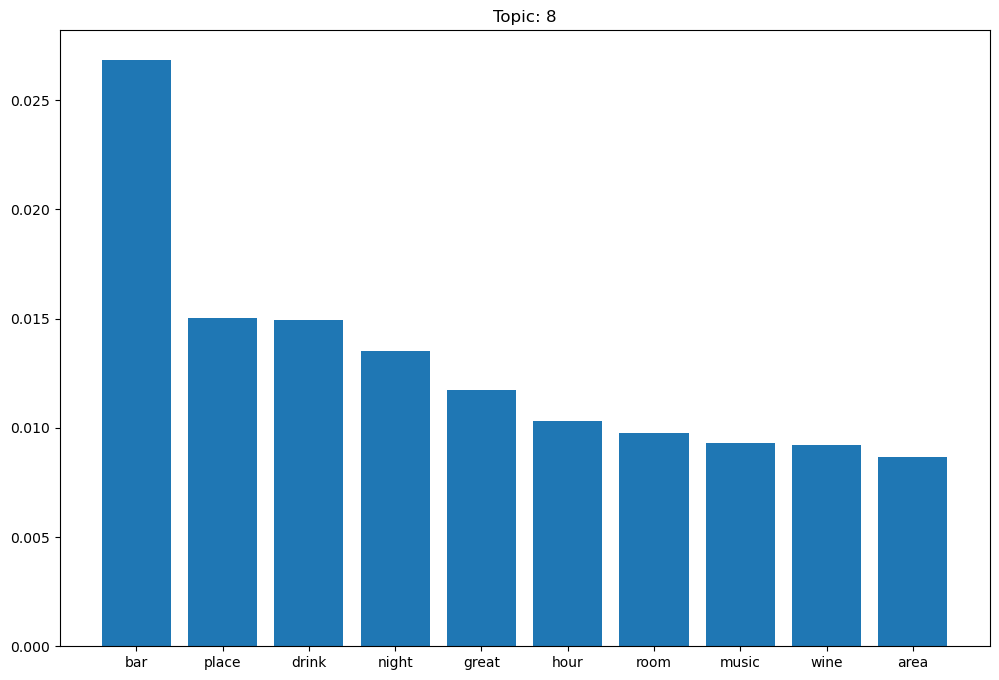

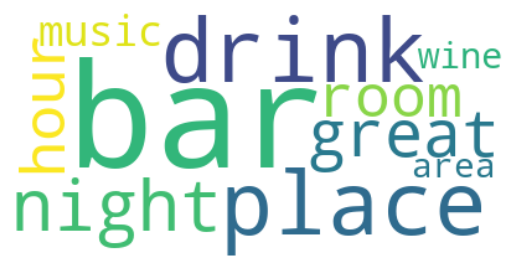

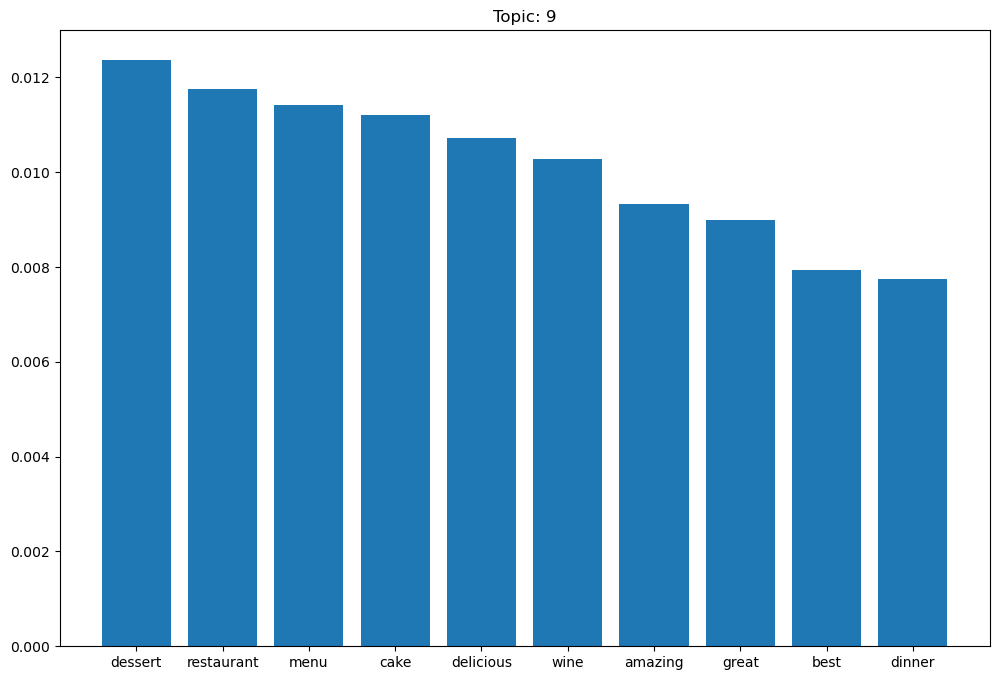

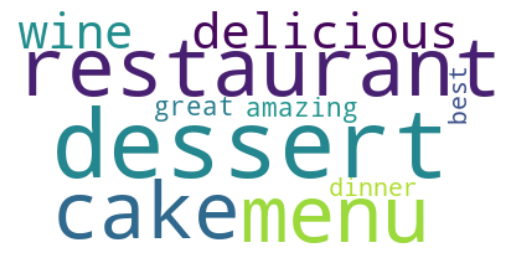

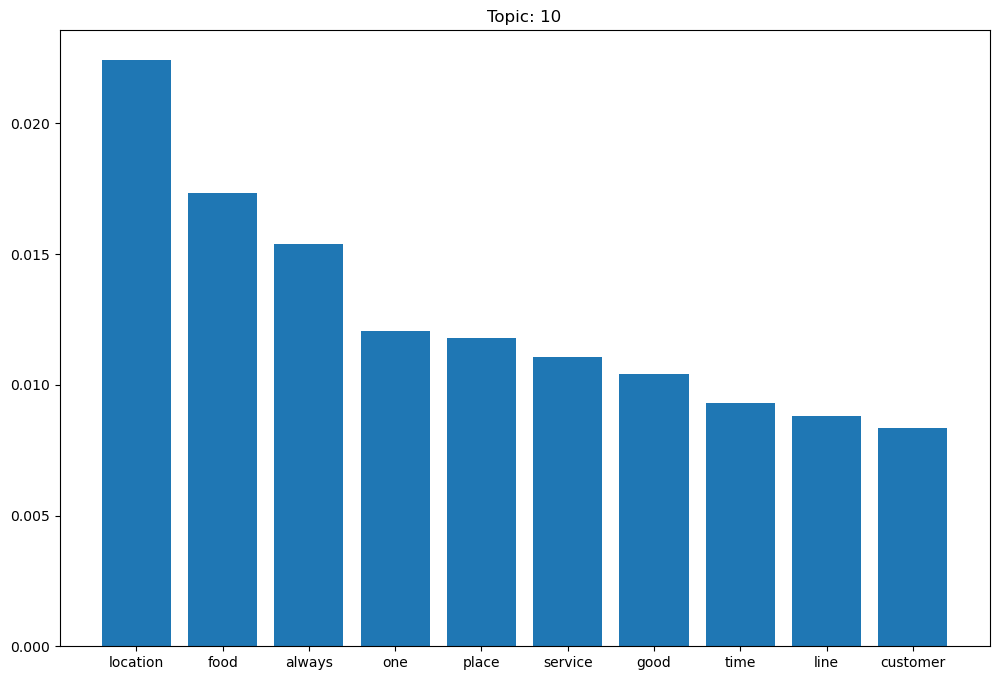

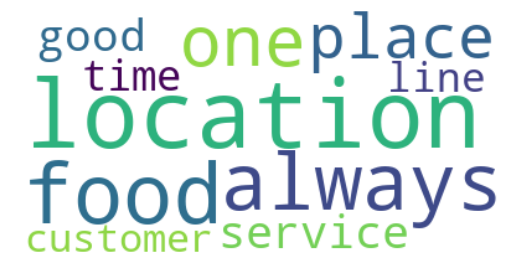

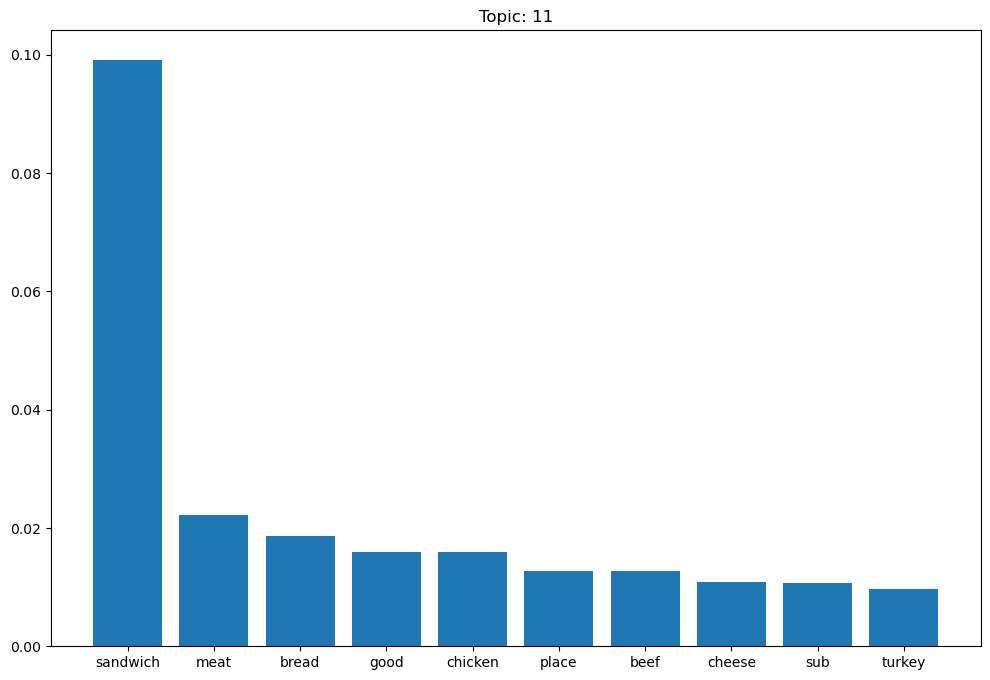

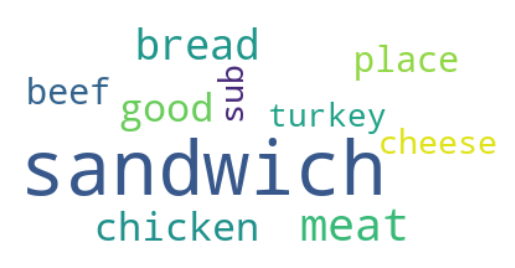

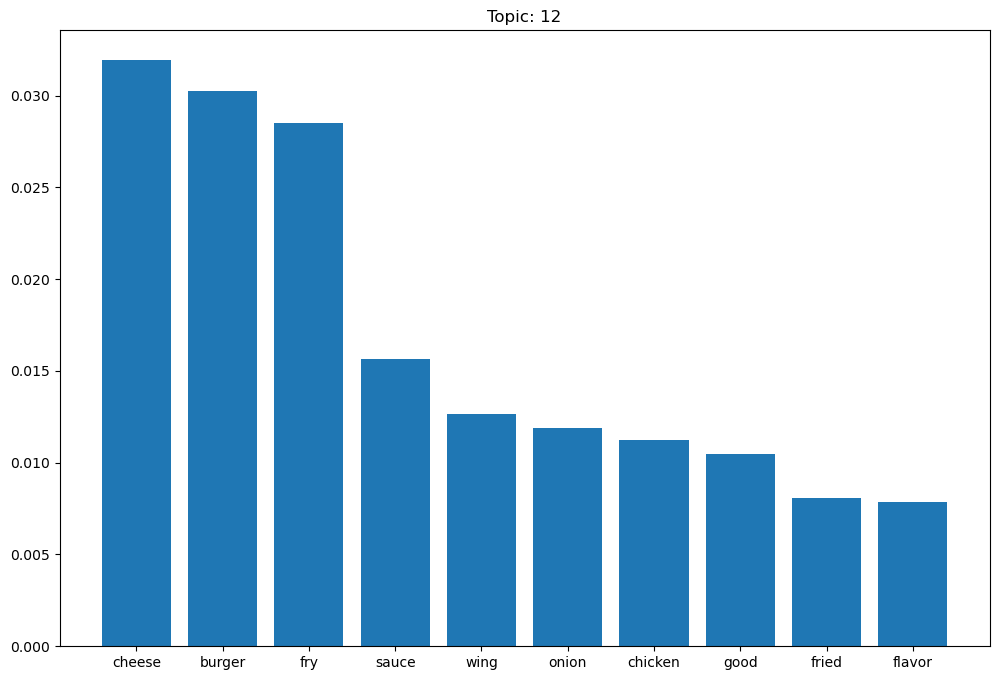

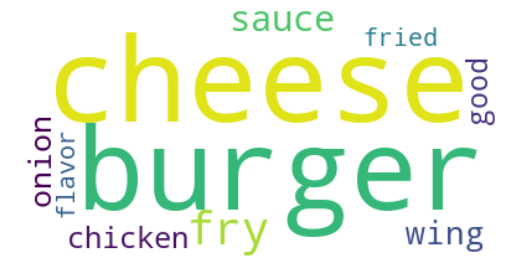

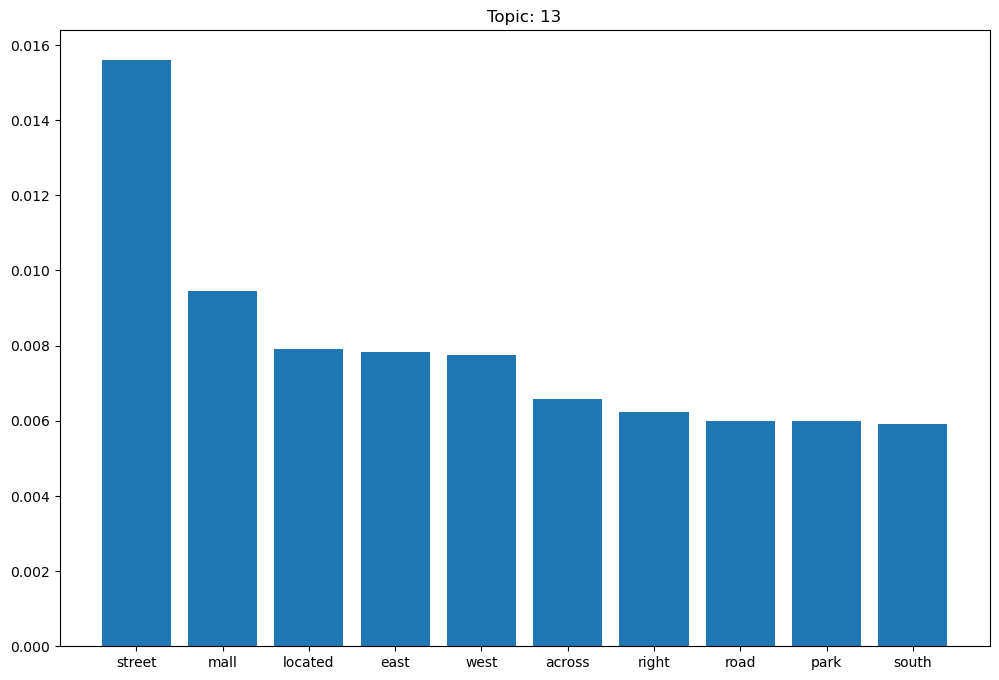

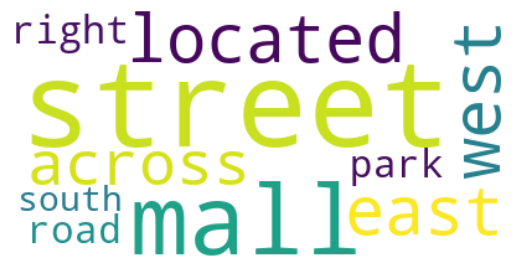

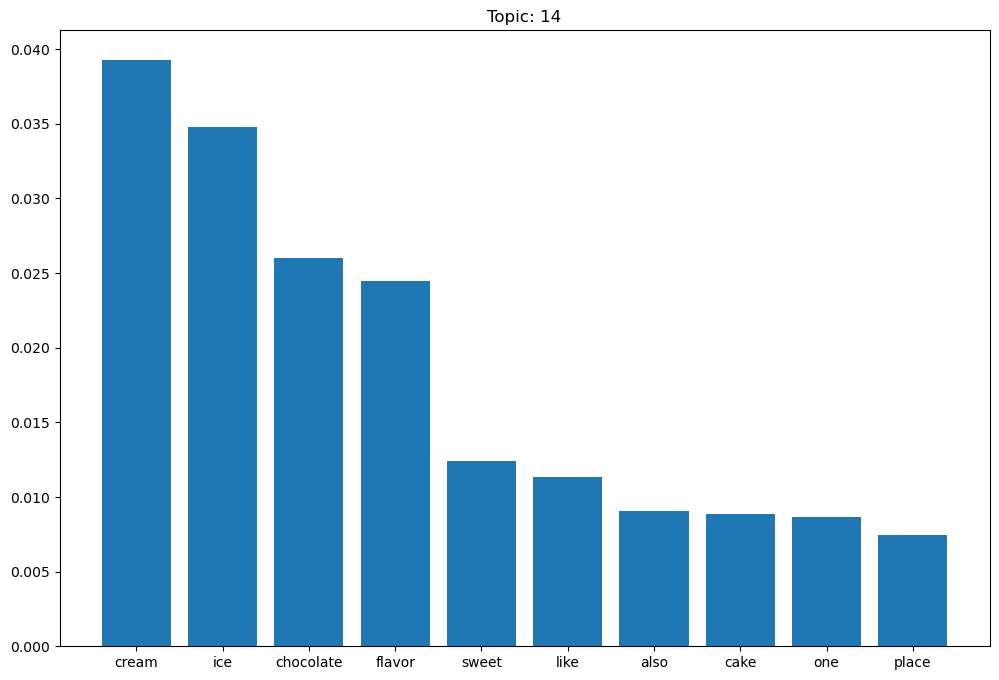

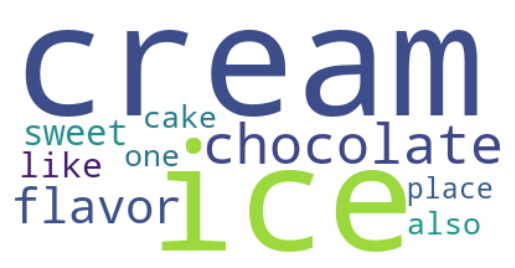

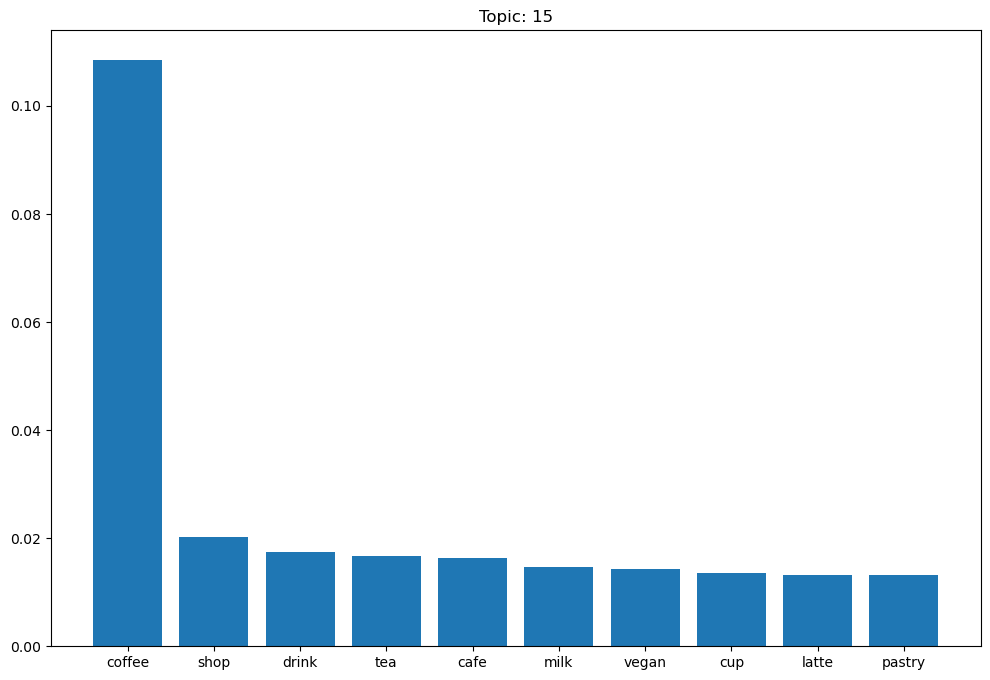

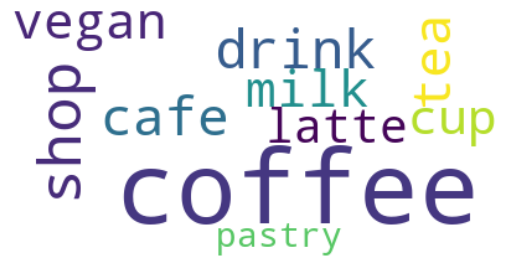

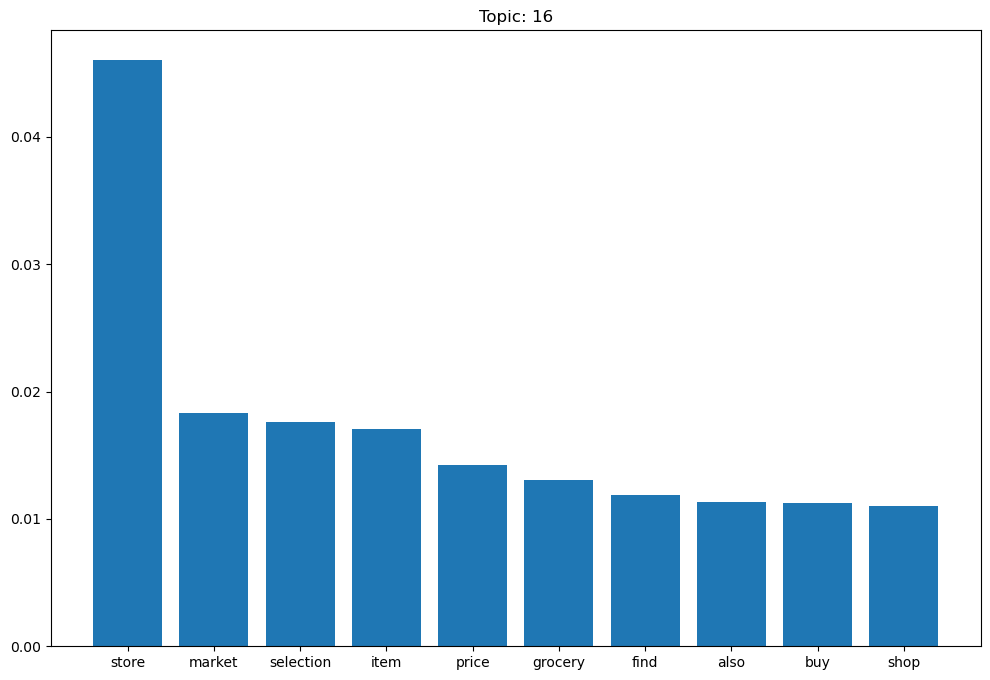

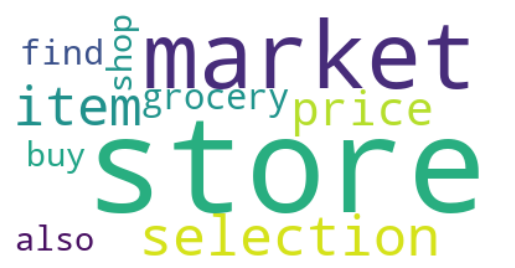

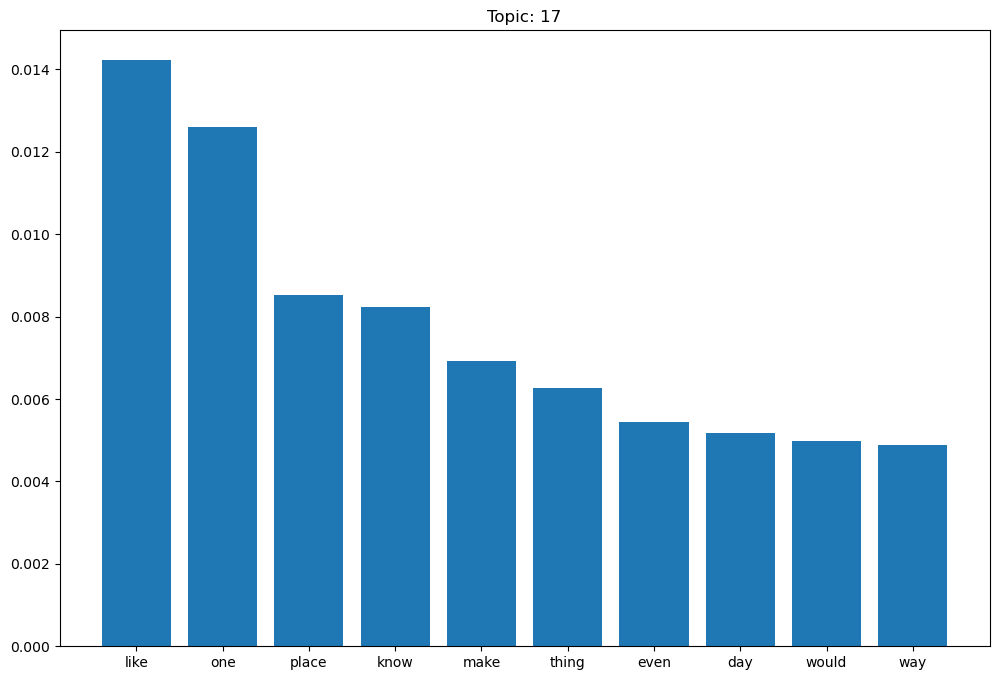

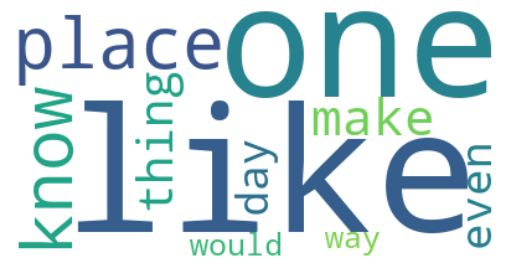

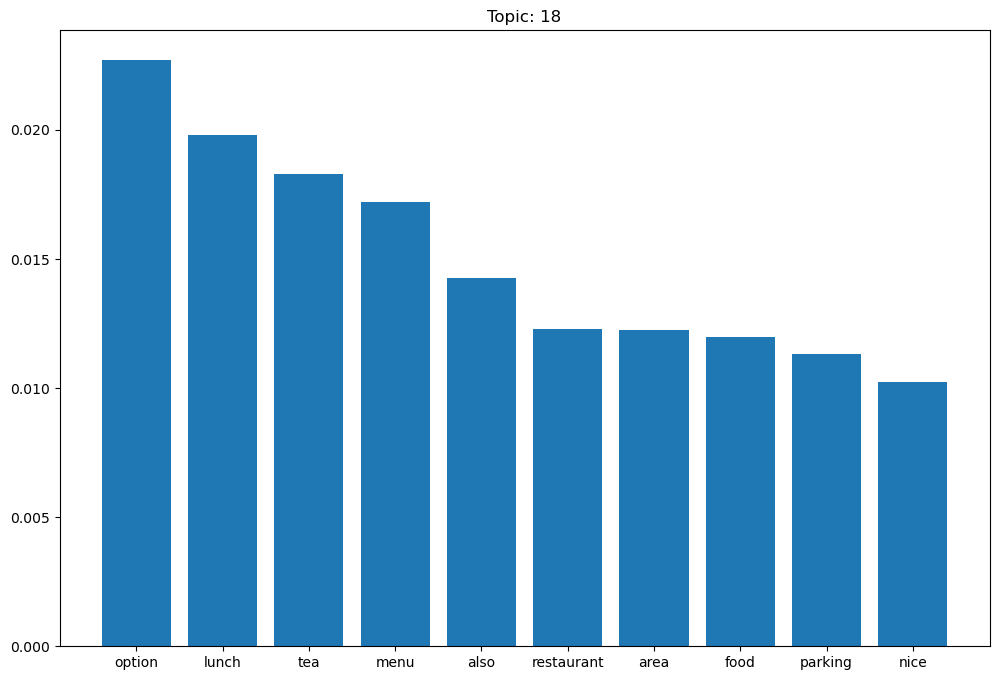

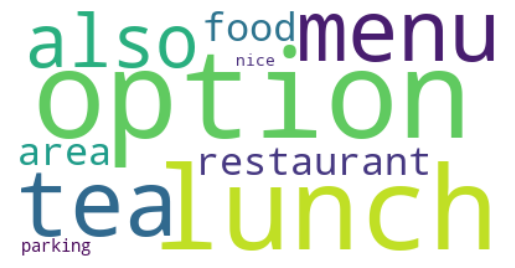

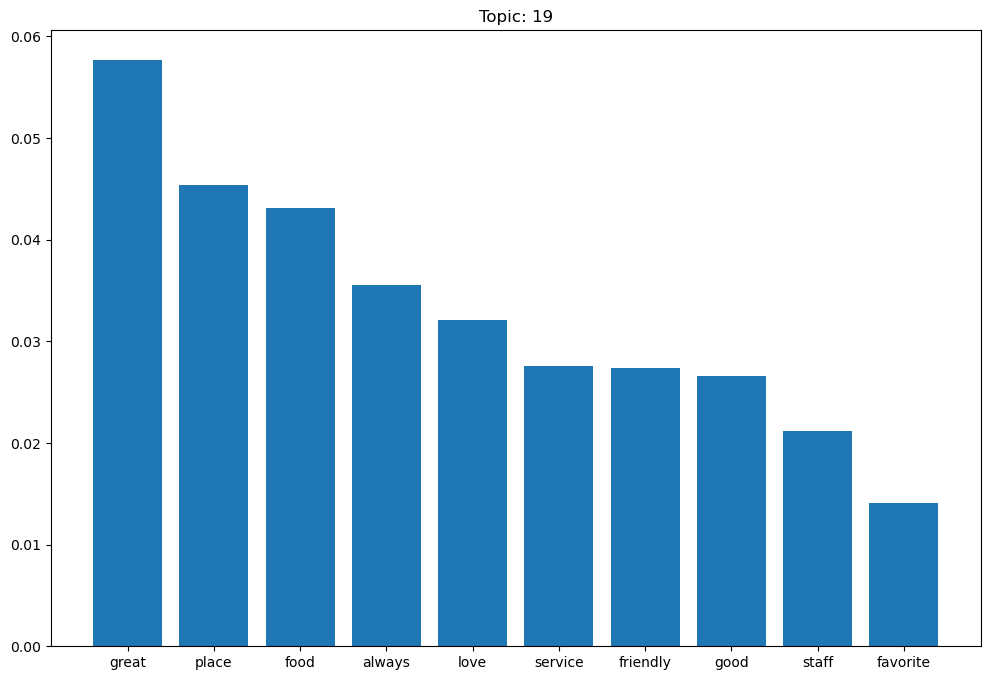

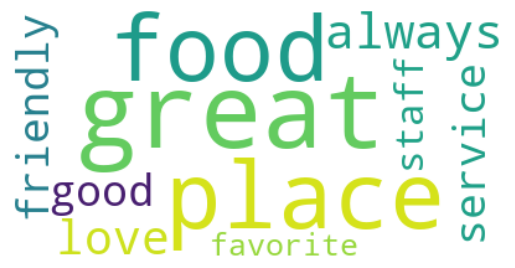

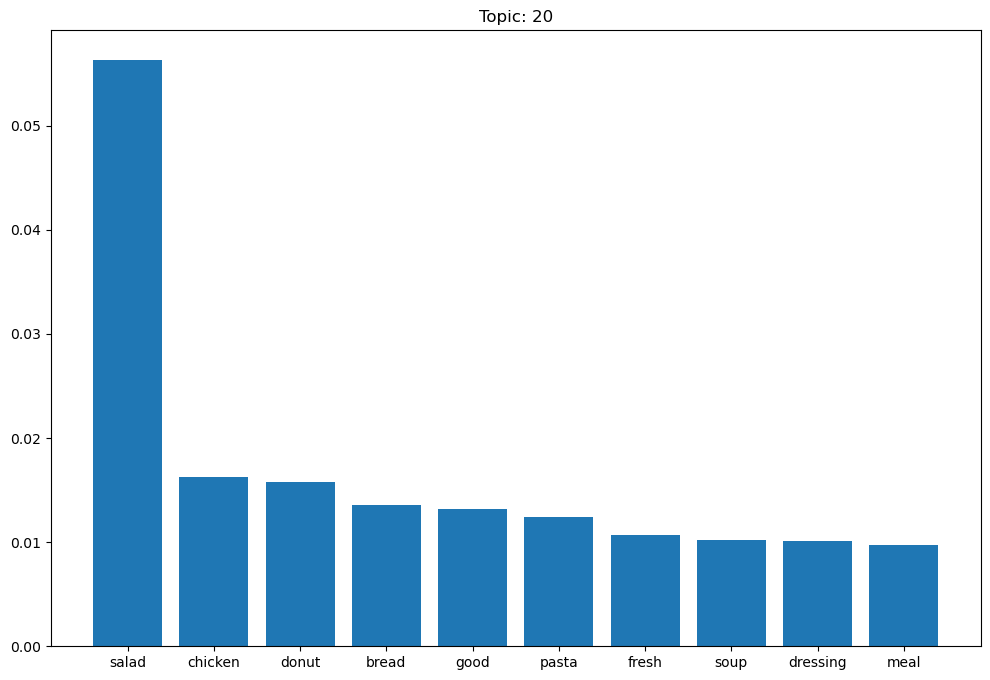

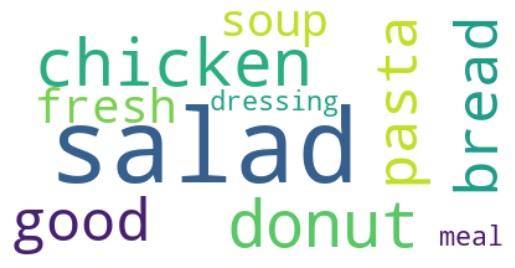

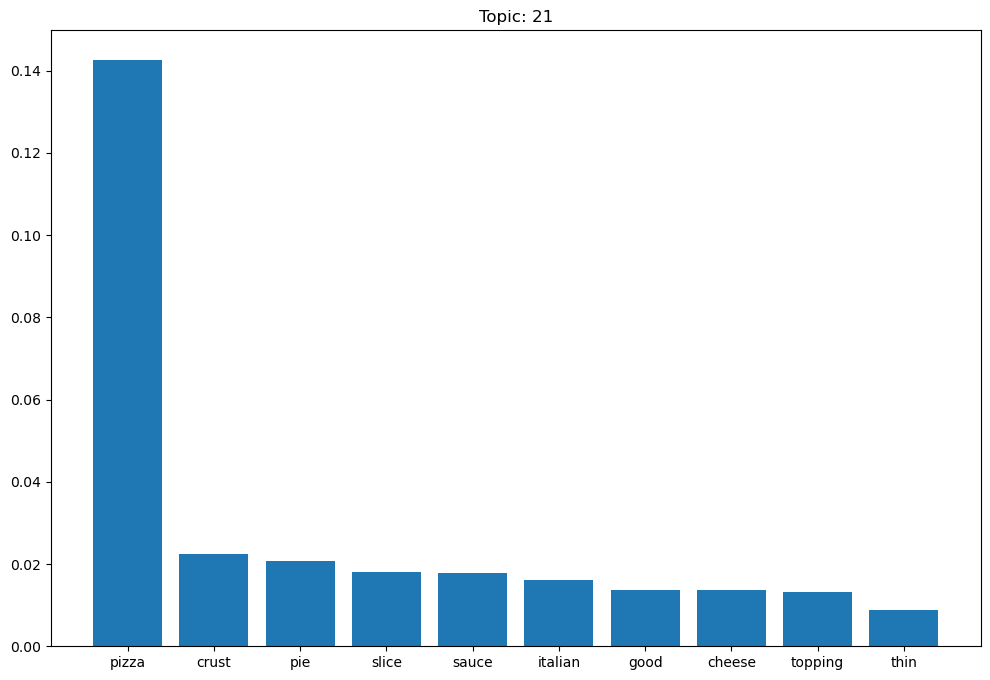

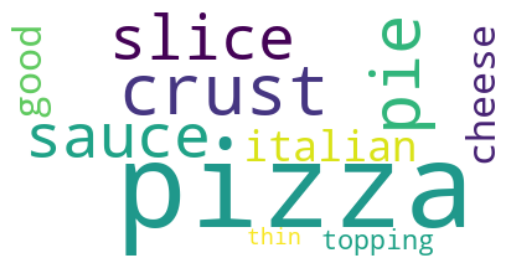

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

for i, topic in enumerate(topics):
    # Extract words and their weights from each topic
    words = [word for word, _ in my_lda.show_topic(topic[0])]
    weights = [weight for _, weight in my_lda.show_topic(topic[0])]

    # Create a frequency distribution
    freq_dist = FreqDist(dict(zip(words, weights)))
    plt.figure(figsize=(12,8))
    plt.title(f'Topic: {i}')
    plt.bar(freq_dist.keys(), freq_dist.values())
    # Save the bar chart
    plt.savefig(f'topic_{i}_bar_chart.png')
    plt.show()

    # Create a word cloud
    wc = WordCloud(background_color="white", max_words=1000)
    wordcloud = wc.generate_from_frequencies(freq_dist)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # Save the word cloud
    plt.savefig(f'topic_{i}_word_cloud.png')
    plt.show()

In [27]:
#row form
col1 = 'topic'
col2 = 'top_ten_words'
dct = {col1: [], col2: []}
no_top_words = 10

for topic_idx in range(my_lda.num_topics):
    top_words = [word for word, _ in my_lda.show_topic(topic_idx, topn=no_top_words)]
    dct[col1].append(str(topic_idx))
    dct[col2].append(" ".join(top_words))
    print(f"Topic {topic_idx}: {top_words}")

Topic 0: ['taco', 'mexican', 'chip', 'salsa', 'burrito', 'food', 'good', 'chicken', 'bean', 'tortilla']
Topic 1: ['shrimp', 'roll', 'sushi', 'crab', 'fish', 'good', 'seafood', 'sauce', 'fried', 'fresh']
Topic 2: ['chicken', 'food', 'rice', 'dish', 'good', 'place', 'soup', 'noodle', 'restaurant', 'sauce']
Topic 3: ['beer', 'bar', 'good', 'great', 'selection', 'burger', 'place', 'food', 'wing', 'tap']
Topic 4: ['bbq', 'dog', 'rib', 'chicken', 'pork', 'hot', 'side', 'sauce', 'meat', 'pulled']
Topic 5: ['breakfast', 'egg', 'toast', 'good', 'brunch', 'bacon', 'waffle', 'french', 'food', 'biscuit']
Topic 6: ['u', 'table', 'came', 'minute', 'got', 'food', 'took', 'said', 'would', 'could']
Topic 7: ['food', 'good', 'would', 'like', 'service', 'drink', 'place', 'got', 'star', 'could']
Topic 8: ['bar', 'place', 'drink', 'night', 'great', 'hour', 'room', 'music', 'wine', 'area']
Topic 9: ['dessert', 'restaurant', 'menu', 'cake', 'delicious', 'wine', 'amazing', 'great', 'best', 'dinner']
Topic 10:

### Finding most dominant topic of each document

In [31]:
import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    sent_topics_df = pd.DataFrame()

    for i, row in tqdm(enumerate(ldamodel[corpus])):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([[int(topic_num), round(prop_topic,4), topic_keywords]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])], ignore_index=True)
            else:
                break

    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=my_lda, corpus=vecs, data=docs)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic.head(10)

102326it [11:45, 144.97it/s]


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10,0.4475,"location, food, always, one, place, service, g...","[yet, disappointed, bruschetta, bad, deal, sto..."
1,1,7,0.4068,"food, good, would, like, service, drink, place...","[ok, see, bar, smell, like, mold, smoke, highe..."
2,2,7,0.3509,"food, good, would, like, service, drink, place...","[decent, place, bartender, rude, however, mean..."
3,3,7,0.5060,"food, good, would, like, service, drink, place...","[food, four, star, bartender, shorting, dollar..."
4,4,7,0.2751,"food, good, would, like, service, drink, place...","[ok, star, service, even, angry, never, know, ..."
5,5,19,0.5724,"great, place, food, always, love, service, fri...","[best, experience, ever, kt, john, server, ama..."
6,6,8,0.3997,"bar, place, drink, night, great, hour, room, m...","[went, happy, hour, let, tell, great, place, g..."
7,7,6,0.3218,"u, table, came, minute, got, food, took, said,...","[like, knight, roudtable, quest, year, good, r..."
8,8,3,0.3196,"beer, bar, good, great, selection, burger, pla...","[happened, pop, wanted, closed, glad, food, be..."
9,9,10,0.5604,"location, food, always, one, place, service, g...","[breakfast, buffet, busy, place, lack, attenti..."


In [32]:
df_dominant_topic.to_csv('dominant_topic.csv', index=False)

In [ ]:
# pip install pyldavis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
# Generate the visuals
#visual= pyLDAvis.gensim.prepare(sg_lda, sg_vecs, sg_dictionary)
visual= gensimvis.prepare(sg_lda, sg_vecs, sg_dictionary)

In [ ]:
pyLDAvis.save_html(visual, "topic_viz.html")

## Generating Bigrams

In [ ]:
# Combine all messages into a single text
all_text = ' '.join(df['content'].dropna().astype(str))

# Tokenize the text
tokens = word_tokenize(all_text)

# Filter out stopwords and non-alphabetic words
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Generate bigrams
bigram_list = list(bigrams(words))

# Convert bigram tuples into a readable string format
bigram_strings = [' '.join(bigram) for bigram in bigram_list]

# Generate bigram frequencies
bigram_freq = Counter(bigram_strings)

# Generate a word cloud for bigrams
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(bigram_freq)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# Export bigram frequencies to a CSV file
bigram_freq_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency'])
bigram_freq_df.to_csv('bigram_frequencies.csv', index=False)

### Generating Trigrams